<a href="https://colab.research.google.com/github/aminzadenoori/Airbnb_Seattle_Data_Analysis/blob/main/Files/Airbnb_Seattle_Price_Reviews_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**buisness question 2:**

**How much is the satisfication of clients with regards to different neibourhoods?**

As a study we want to to investigate that how different neibourhoods and prices can be realted to satisfaction of the custoumers based only on the review score left by them.

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Remove '$' and other chracters from the price column
df=pd.read_csv("https://raw.githubusercontent.com/chaitanyakasaraneni/seattle_airbnb_dataAnalysis/master/data/listings.csv")
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].astype('float64')
num_df=df.select_dtypes(exclude='object')  

In [ ]:
#Drop all the rows without review scores
df=df.dropna(how='all',subset=['review_scores_value'],axis=0)

In [ ]:
#Group review scores 
roomType_DF=df.groupby('review_scores_value').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,review_scores_value,number_Of_Listings
0,2.0,1
1,4.0,4
2,5.0,1
3,6.0,16
4,7.0,38
5,8.0,190
6,9.0,1137
7,10.0,1775


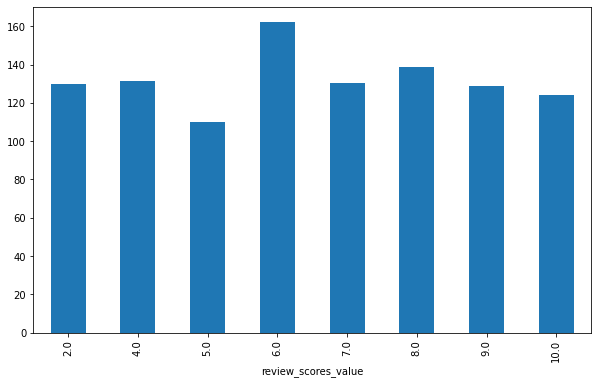

In [5]:
#Average price of different reviews score shown in a bar graph to
df.groupby('review_scores_value').mean()['price'].plot.bar( figsize=(10, 6));


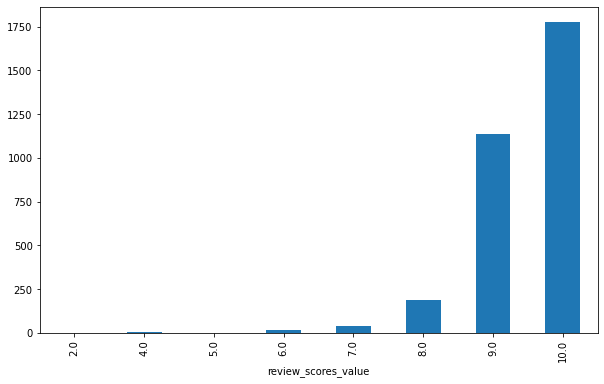

In [ ]:
#Count the number of differetn lisitngs with regards to review scores
df.groupby('review_scores_value').id.count().plot.bar( figsize=(10, 6));


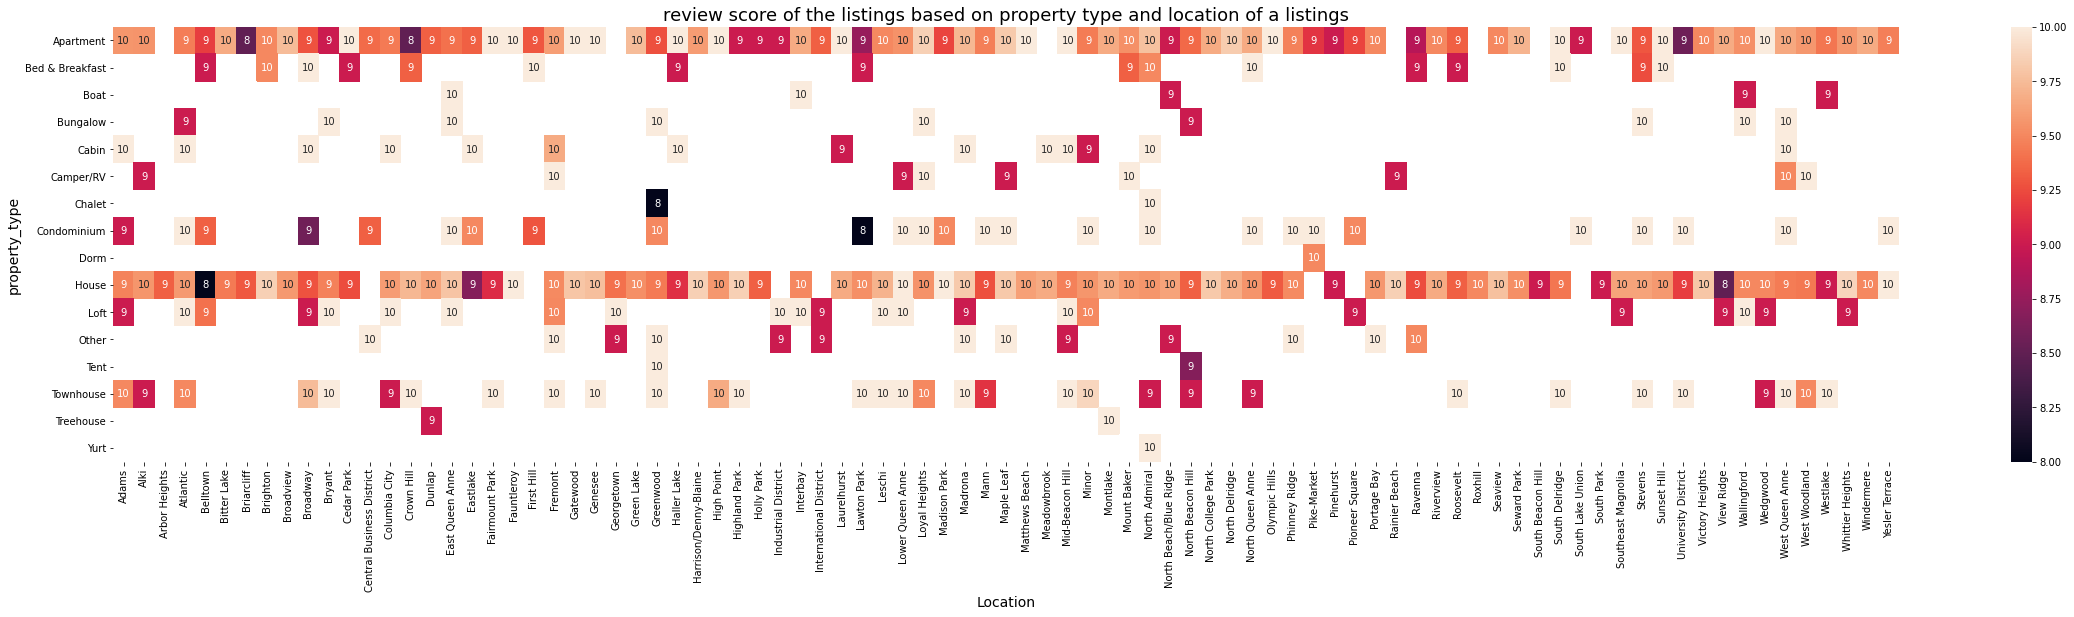

In [ ]:
#Heatmap of price average of different room and property types
plt.figure(figsize=(40, 8))
sns.heatmap(df.groupby(['property_type', 'neighbourhood_cleansed'])['review_scores_value'].mean().unstack(),annot=True, fmt=".0f")
plt.ylabel("property_type", size=14)
plt.xlabel("Location", size=14)
plt.title("review score of the listings based on property type and location of a listings", size=18)
plt.savefig("barplot_Seaborn_barplot_Python.png")